<a href="https://colab.research.google.com/github/sykathowlader/group6_introToAi/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import math

In [2]:
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


I want to create a Random Forest model. All my data are numeric. Let's start splitting the data into training and testing.

In [3]:
# get data and label
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)
print (X.shape)
print (y.shape)

#scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training/testing split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Instantiate the model with 10 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=20,criterion="entropy")

#Train the model
Random_Forest_model.fit(X_train, y_train)

#make predictions
y_pred = Random_Forest_model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

#Calculate accuracy metric
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')

(253680, 21)
(253680,)
[0. 0. 0. 0. 2.]
219620    0.0
132821    0.0
151862    0.0
139717    0.0
239235    0.0
Name: Diabetes_012, dtype: float64
The accuracy is:  83.719646799117 %


In [4]:
grid_models = [(RandomForestClassifier(),[{'n_estimators':[50,100,150,200],'max_depth':[8,10,13],'criterion':['gini','entropy'],'max_features':[1,3,5]}])]

In [23]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)

RandomForestClassifier():
Best Accuracy : 84.91%
Best Parameters :  {'criterion': 'gini', 'max_depth': 13, 'max_features': 5, 'n_estimators': 100}


In [10]:
# Fit the model on the training data
rf = RandomForestClassifier(max_depth=13, criterion='gini', n_estimators =200, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [17]:
y_pred=rf.predict(X_test)
print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.8575
Test set score: 0.8505


In [18]:
# Check MSE & RMSE
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.5423368022705771
Root Mean Squared Error : 0.7364351989622557


In [19]:
matrix = classification_report(y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.59      0.14      0.22      6997

    accuracy                           0.85     50736
   macro avg       0.48      0.37      0.38     50736
weighted avg       0.81      0.85      0.80     50736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


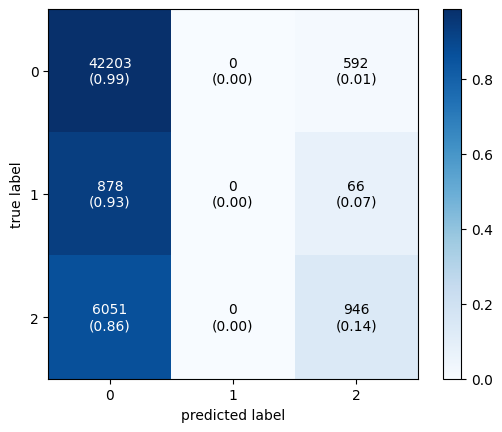

In [21]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True,colorbar=True)
plt.show()